In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Bank_credit.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

REMPLACONS LES VALEURS NULLES PAR LE MODE DES VALEURS DE TYPES OBJECT

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

REMPLACONS LES VALEURS NULLES PAR LA MEDIANE DES VALEURS DE TYPES NUMERIQUE

In [11]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [12]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

DETECTION ET TRAITEMENT DES VALEURS ABERRANTES

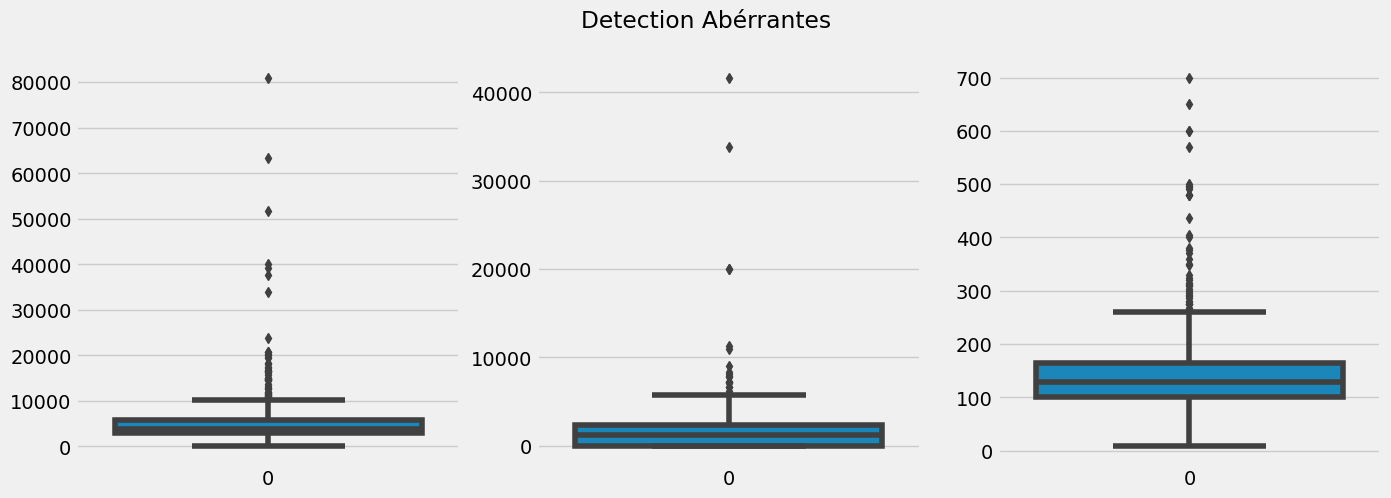

In [13]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])
plt.suptitle('Detection Abérrantes')
plt.show()

In [14]:
print("Avant de supprimer les valeurs abérrantes", df.shape)
df = df[df['ApplicantIncome']<25000]
print("Apres de supprimer les valeurs abérrantes", df.shape)

Avant de supprimer les valeurs abérrantes (614, 13)
Apres de supprimer les valeurs abérrantes (607, 13)


In [15]:
print("Avant de supprimer les valeurs abérrantes", df.shape)
df = df[df['CoapplicantIncome']<12000]
print("Apres de supprimer les valeurs abérrantess", df.shape)

Avant de supprimer les valeurs abérrantes (607, 13)
Apres de supprimer les valeurs abérrantess (603, 13)


ANALYSE

/tmp/ipykernel_6197/1476150447.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], color='green')
/tmp/ipykernel_6197/1476150447.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'], color='green')
/tmp/ipykernel_6197/1476150447.py:6: UserWarning: 



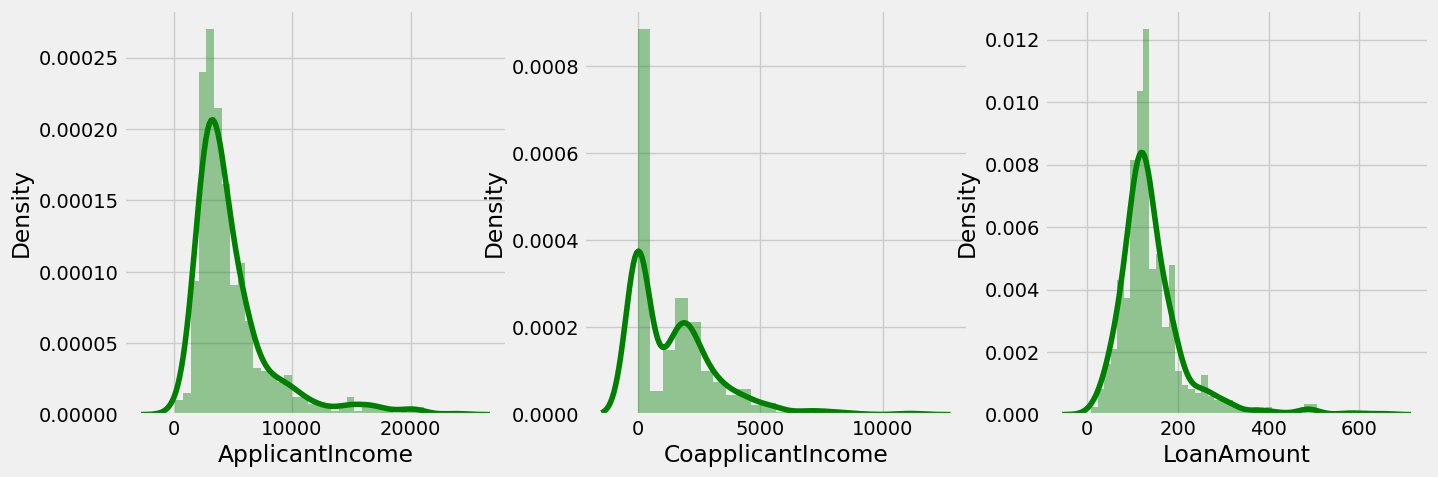

In [16]:
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color='green')
plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color='green')
plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color='green')
plt.show()

/tmp/ipykernel_6197/835382753.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], color='green')
/tmp/ipykernel_6197/835382753.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'], color='green')
/tmp/ipykernel_6197/835382753.py:8: UserWarning: 

`di

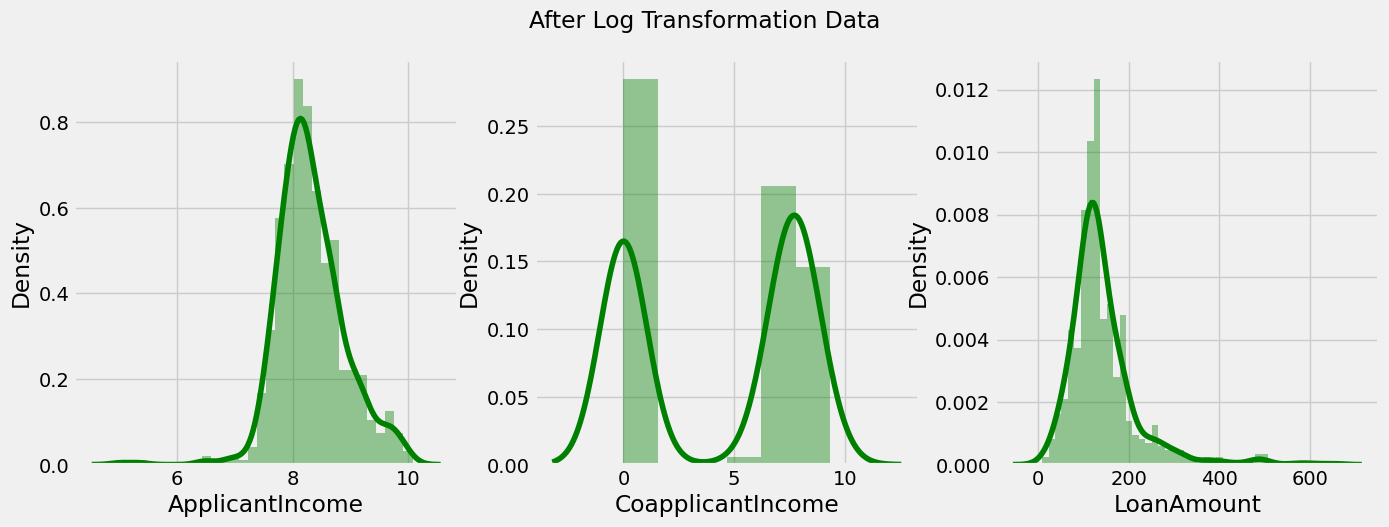

In [17]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color='green')
plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color='green')
plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color='green')
plt.suptitle('After Log Transformation Data')
plt.show()

ANALYSE CATEGORIELLE

In [18]:
categorical_col = df.select_dtypes(include='object').columns
cat = categorical_col[1:-1]

In [19]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

/home/ngoran/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


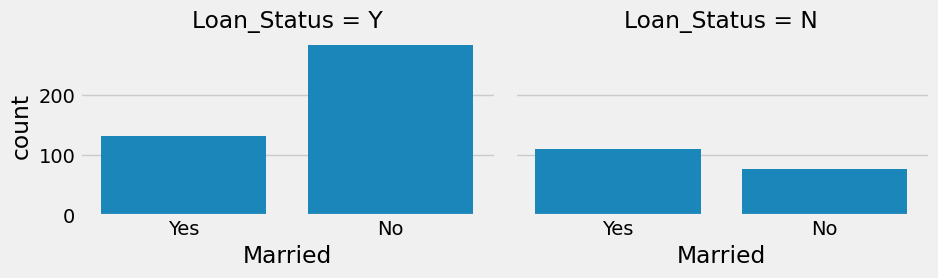

In [20]:
grid=sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Married')

/home/ngoran/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


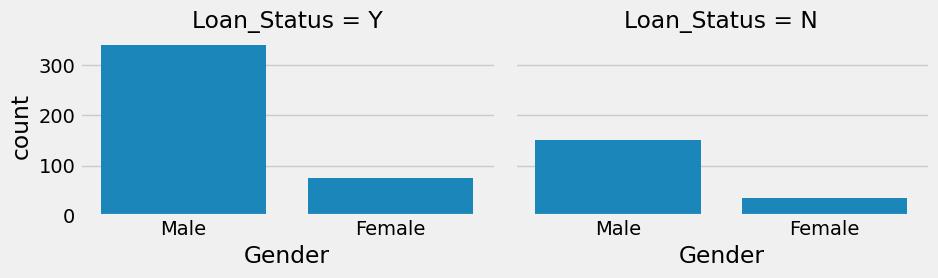

In [21]:
grid=sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Gender')

/home/ngoran/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


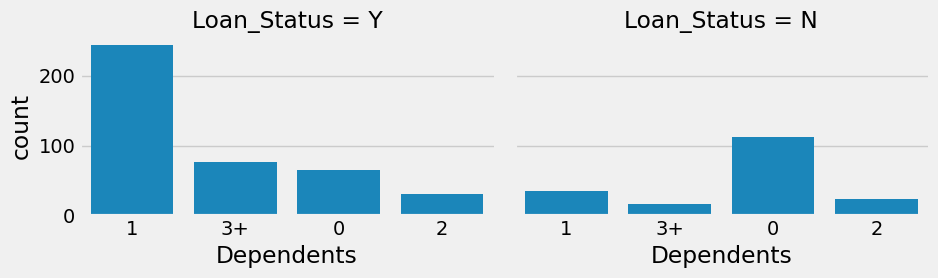

In [22]:

grid=sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Dependents')

/home/ngoran/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


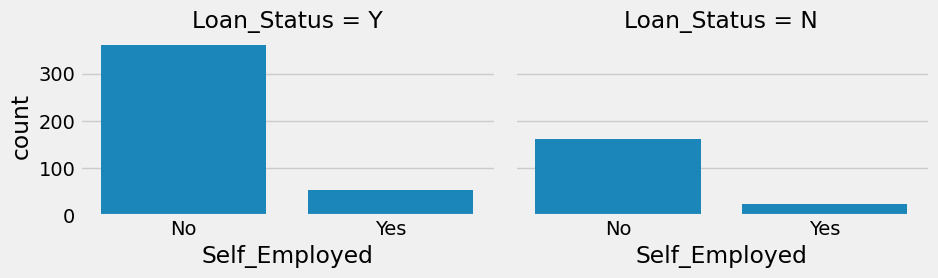

In [23]:
grid=sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Self_Employed')

/home/ngoran/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


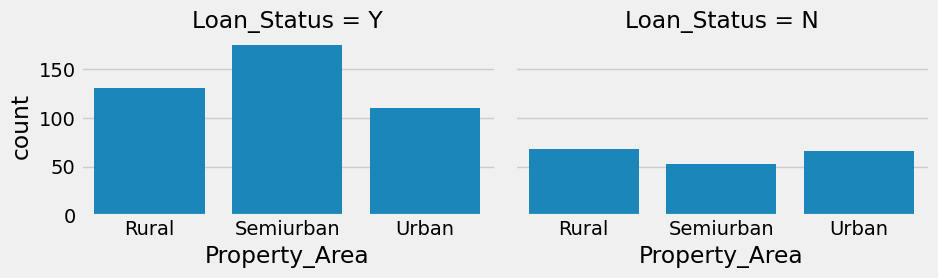

In [24]:

grid=sns.FacetGrid(df, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Property_Area')

ANALYSE CATEGORIQUE AVEC LA VARIABLE CIBLE

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
print(pd.crosstab(df['Loan_Status'],df['Married']))

Married       No  Yes
Loan_Status          
N             77  110
Y            132  284


In [27]:
print(pd.crosstab(df['Loan_Status'],df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 135            52
Y                 334            82


In [28]:
print(pd.crosstab(df['Loan_Status'],df['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 68         53     66
Y                110        175    131


In [29]:
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              162   25
Y              361   55


PREPARATION DE DONNEES

In [30]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [31]:
#SUPPRESSION DE LA COLONNE Loan_ID
del df['Loan_ID']

In [32]:
#ON REMPLACE LES VARIABLES CI-DESSOUS PAR 1 ET 0
df['Gender'] = df['Gender'].replace(('Male', 'Female'),(1,0))
df['Married'] = df['Married'].replace(('Yes', 'No'),(1,0))
df['Education'] = df['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [34]:
df['Dependents'].value_counts()

0     356
1     100
2     100
3+     47
Name: Dependents, dtype: int64

In [35]:
#ON REMPLACE EGALEMENT
df['Self_Employed'] = df['Self_Employed'].replace(('Yes', 'No'),(1,0))
df['Loan_Status'] = df['Loan_Status'].replace(('Y', 'N'),(1,0))
df['Property_Area'] = df['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,2,3))
df['Dependents'] = df['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))

In [36]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,3,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [37]:
df.nunique()

Gender                 2
Married                2
Dependents             2
Education              2
Self_Employed          2
ApplicantIncome      495
CoapplicantIncome    284
LoanAmount           198
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

COLLERATIONS DES DONNEES

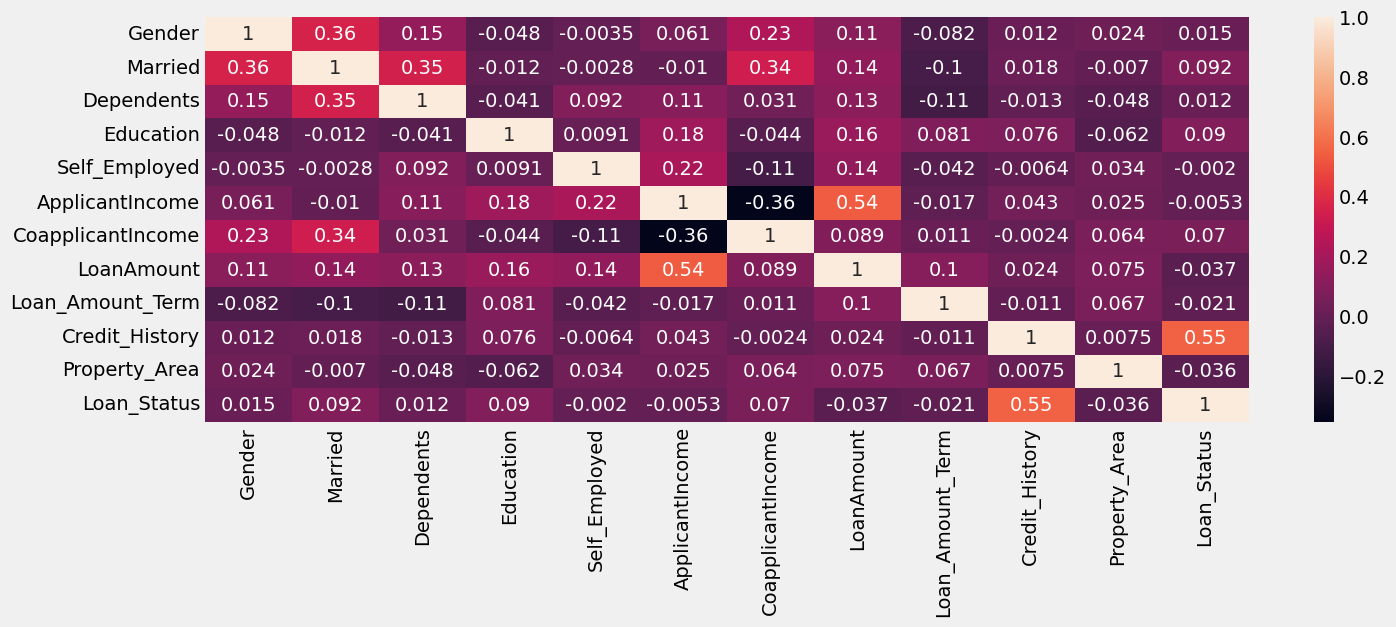

In [38]:
sns.heatmap(df.corr(),annot=True)
plt.show()

DIVISER L'ENSEMBLE DES DONNEES

In [39]:
y = df['Loan_Status']
x = df.drop(['Loan_Status'], axis = 1)

In [40]:
x.shape

(603, 11)

In [41]:
y.shape

(603,)

TRAITEMENT DES DONNEES DE DESEQUILIBRE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
x_resample, y_resample = SMOTE().fit_resample(x, y)

In [44]:
print(x_resample.shape)
print(y_resample.shape)

(832, 11)
(832,)


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2)

In [47]:
x_train.shape

(665, 11)

In [48]:
x_test.shape

(167, 11)

In [49]:
y_train.shape, y_test.shape

((665,), (167,))

In [50]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [51]:
#APPLIQUER LES MODELES ET CHOISIR LE MEILLEURS MODELES
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42)
}
#LA FONCTION DE PRECISION
#on importe accuracy_score
def accu(y_true, y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du modele est : {acc}')
        
#LA FONCTION D'APPLICATION
def train_test_eval(models,x_train,y_train,x_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(x_train,y_train)
        accu(y_test,model.predict(x_test))
        print('_'*30)
train_test_eval(models,x_train,y_train,x_test,y_test)

LogisticRegression :
la precision du modele est : 0.7544910179640718
______________________________
KNeighborsClassifier :
la precision du modele est : 0.6347305389221557
______________________________
DecisionTreeClassifier :
la precision du modele est : 0.7724550898203593
______________________________


/home/ngoran/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
def mymodel(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    print("Model :-",str(model))
    print('\nModel Accuracy: ', accuracy_score(y_test, y_pred))
    print(f'\nTraining Accuracy:{train_accuracy} \nTesting Accuracy :{test_accuracy}')
    print('--------------------------------------')
    print()
    return model


In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
knn = mymodel(KNeighborsClassifier())
svc = mymodel(SVC())
dt = mymodel(DecisionTreeClassifier())
lr = mymodel(LogisticRegression())
gnb = mymodel(GaussianNB())
rfc = mymodel(RandomForestClassifier())

Model :- KNeighborsClassifier()

Model Accuracy:  0.6347305389221557

Training Accuracy:0.7804511278195488 
Testing Accuracy :0.6347305389221557
--------------------------------------

Model :- SVC()

Model Accuracy:  0.5089820359281437

Training Accuracy:0.5097744360902255 
Testing Accuracy :0.5089820359281437
--------------------------------------

Model :- DecisionTreeClassifier()

Model Accuracy:  0.7724550898203593

Training Accuracy:1.0 
Testing Accuracy :0.7724550898203593
--------------------------------------



/home/ngoran/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model :- LogisticRegression()

Model Accuracy:  0.7544910179640718

Training Accuracy:0.7894736842105263 
Testing Accuracy :0.7544910179640718
--------------------------------------

Model :- GaussianNB()

Model Accuracy:  0.7784431137724551

Training Accuracy:0.7864661654135339 
Testing Accuracy :0.7784431137724551
--------------------------------------

Model :- RandomForestClassifier()

Model Accuracy:  0.7844311377245509

Training Accuracy:1.0 
Testing Accuracy :0.7844311377245509
--------------------------------------



In [54]:
#LE MEILLEUR MODEL EST 
from sklearn.linear_model import LogisticRegression

In [55]:
LR = LogisticRegression()

In [56]:
LR.fit(x_train,y_train)

/home/ngoran/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = LR.predict(x_test)

In [58]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [59]:
print("Training Accuracy",LR.score(x_train,y_train))

Training Accuracy 0.7894736842105263


In [60]:
print("Testing Accuracy",LR.score(x_test,y_test))

Testing Accuracy 0.7544910179640718


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69        76
           1       0.72      0.89      0.80        91

    accuracy                           0.75       167
   macro avg       0.77      0.74      0.74       167
weighted avg       0.77      0.75      0.75       167



In [62]:
print("Our Model Accuracy is",accuracy_score(y_pred,y_test))

Our Model Accuracy is 0.7544910179640718


In [63]:
#ENREGISTRER LE MODEL
import pickle
pickle.dump(LR,open('model.pkl','wb'))

In [64]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,3
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1


In [65]:
prediction = LR.predict([[0,0,0,0,0,10.25,7.31,128.0,360.0,1.0,2]])

/home/ngoran/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
prediction

array([0])

In [67]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,3,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1
